## KNN and CNN model code

The code below shows how we can create a KNN model using Scikit-learn as well as a CNN model using tensorflow in order to predict meteor, rocket, and non events.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedGroupKFold
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from data_processing.B_FFT_Graph_Generator.FFT_Generator_image import main as fft_generator
from datetime import datetime, timedelta,time
import plotly.io as pio
import plotly.graph_objects as go


import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from PIL import Image
import numpy as np
import glob

In [2]:
df_ml_dataset = pd.DataFrame()
for x in range(10) : 
    df_chunk = pd.read_csv(f'notebooks/event_frequency_dataset_{x}.csv',index_col=0)
    df_ml_dataset = pd.concat([df_ml_dataset,df_chunk])
df_ml_dataset

C:\Users\Embed\AppData\Local\Temp\ipykernel_37356\480116612.py:3: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_chunk = pd.read_csv(f'notebooks/event_frequency_dataset_{x}.csv',index_col=0)


,Time,Channel 0,Channel 1,event_id,original_id,event,start_time,end_time,source,parquet_files
0,4310.00,0.021815,0.074526,2,9.0,meteor,2024-07-27 00:51:59,2024-07-27 00:52:01,AMS,E:/TDVS\2024-07-27(6789)\00-00(360)\data-2024-...
1,4310.01,0.021064,0.009177,2,9.0,meteor,2024-07-27 00:51:59,2024-07-27 00:52:01,AMS,E:/TDVS\2024-07-27(6789)\00-00(360)\data-2024-...
2,4310.02,0.020605,-0.009844,2,9.0,meteor,2024-07-27 00:51:59,2024-07-27 00:52:01,AMS,E:/TDVS\2024-07-27(6789)\00-00(360)\data-2024-...
3,4310.03,0.020775,-0.007408,2,9.0,meteor,2024-07-27 00:51:59,2024-07-27 00:52:01,AMS,E:/TDVS\2024-07-27(6789)\00-00(360)\data-2024-...
4,4310.04,0.020293,0.023452,2,9.0,meteor,2024-07-27 00:51:59,2024-07-27 00:52:01,AMS,E:/TDVS\2024-07-27(6789)\00-00(360)\data-2024-...
...,...,...,...,...,...,...,...,...,...,...
4770761,2009.96,-2.441657,-2.450518,4338,NaN,non_event,NaN,NaN,NaN,E:/TDVS\2024-08-19(8628)\00-00(348)\data-2024-...
4770762,2009.97,-2.441662,-2.450510,4338,NaN,non_event,NaN,NaN,NaN,E:/TDVS\2024-08-19(8628)\00-00(348)\data-2024-...
4770763,2009.98,-2.441656,-2.450504,4338,NaN,non_event,NaN,NaN,NaN,E:/TDVS\2024-08-19(8628)\00-00(348)\data-2024-...
4770764,2009.99,-2.441666,-2.450514,4338,NaN,non_event,NaN,NaN,NaN,E:/TDVS\2024-08-19(8628)\00-00(348)\data-2024-...


In [4]:
df_ml_dataset['event'].unique()

array(['meteor', 'rocket', 'non_event'], dtype=object)

In [3]:
rocket_df = df_ml_dataset[df_ml_dataset['event'] == 'rocket']
rocket_df

,Time,Channel 0,Channel 1,event_id,original_id,event,start_time,end_time,source,parquet_files
1105104,21890.00,4.752088,4.740419,1003,0.0,rocket,2024-07-27 05:45:00,2024-07-27 05:53:50,Rocket,E:/TDVS\2024-07-27(6789)\05-00(360)\data-2024-...
1105105,21890.01,4.759712,4.750501,1003,0.0,rocket,2024-07-27 05:45:00,2024-07-27 05:53:50,Rocket,E:/TDVS\2024-07-27(6789)\05-00(360)\data-2024-...
1105106,21890.02,4.755774,4.798404,1003,0.0,rocket,2024-07-27 05:45:00,2024-07-27 05:53:50,Rocket,E:/TDVS\2024-07-27(6789)\05-00(360)\data-2024-...
1105107,21890.03,4.758737,4.769957,1003,0.0,rocket,2024-07-27 05:45:00,2024-07-27 05:53:50,Rocket,E:/TDVS\2024-07-27(6789)\05-00(360)\data-2024-...
1105108,21890.04,4.759868,4.746594,1003,0.0,rocket,2024-07-27 05:45:00,2024-07-27 05:53:50,Rocket,E:/TDVS\2024-07-27(6789)\05-00(360)\data-2024-...
...,...,...,...,...,...,...,...,...,...,...
2429422,122879.96,-8.515895,-8.522952,1016,13.0,rocket,2024-08-12 10:37:00,2024-08-12 10:46:00,Rocket,E:/TDVS\2024-08-12\10-00(360)\data-2024-08-12T...
2429423,122879.97,-8.509873,-8.522957,1016,13.0,rocket,2024-08-12 10:37:00,2024-08-12 10:46:00,Rocket,E:/TDVS\2024-08-12\10-00(360)\data-2024-08-12T...
2429424,122879.98,-8.516345,-8.522888,1016,13.0,rocket,2024-08-12 10:37:00,2024-08-12 10:46:00,Rocket,E:/TDVS\2024-08-12\10-00(360)\data-2024-08-12T...
2429425,122879.99,-8.514479,-8.522875,1016,13.0,rocket,2024-08-12 10:37:00,2024-08-12 10:46:00,Rocket,E:/TDVS\2024-08-12\10-00(360)\data-2024-08-12T...


In [20]:
rocket_df = df_ml_dataset[df_ml_dataset['event'] == 'rocket']

rocket_files = rocket_df['parquet_files'].unique().tolist()
rocket_event_ids = rocket_df.groupby(['event_id','parquet_files']).count().reset_index().drop_duplicates()[['event_id']].values
len(rocket_files)

1323

In [22]:
meteor_df = df_ml_dataset[df_ml_dataset['event'] == 'meteor']

meteor_files = meteor_df['parquet_files'].unique().tolist()
meteor_event_ids = meteor_df.groupby(['event_id','parquet_files']).count().reset_index().drop_duplicates()[['event_id']].values


len(meteor_files)

1051

In [23]:
non_event_df = df_ml_dataset[df_ml_dataset['event'] == 'non_event']

non_event_files = non_event_df['parquet_files'].unique().tolist()
non_event_event_ids = non_event_df.groupby(['event_id','parquet_files']).count().reset_index().drop_duplicates()[['event_id']].values

len(non_event_files)

2339

In [25]:
X = df_ml_dataset[['Channel 0','Channel 1']].values
y = df_ml_dataset['event'].values
groups = df_ml_dataset['event_id'].values


In [27]:
sgkf = StratifiedGroupKFold(n_splits=3)
for i, (train_index, test_index) in enumerate(sgkf.split(X, y, groups)):
    print(f"Fold {i}:")
    # print(f"  Train: index={train_index}")
    # print(f"         group={groups[train_index]}")
    # print(f"  Test:  index={test_index}")
    # print(f"         group={groups[test_index]}")


    X_train, X_test, y_train, y_test = X[train_index],X[test_index],y[train_index],y[test_index]

    model = KNeighborsClassifier(n_neighbors=11)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))



Fold 0:
0.5474575424575424
Fold 1:
0.6629766399734451
Fold 2:
0.6612837506029261


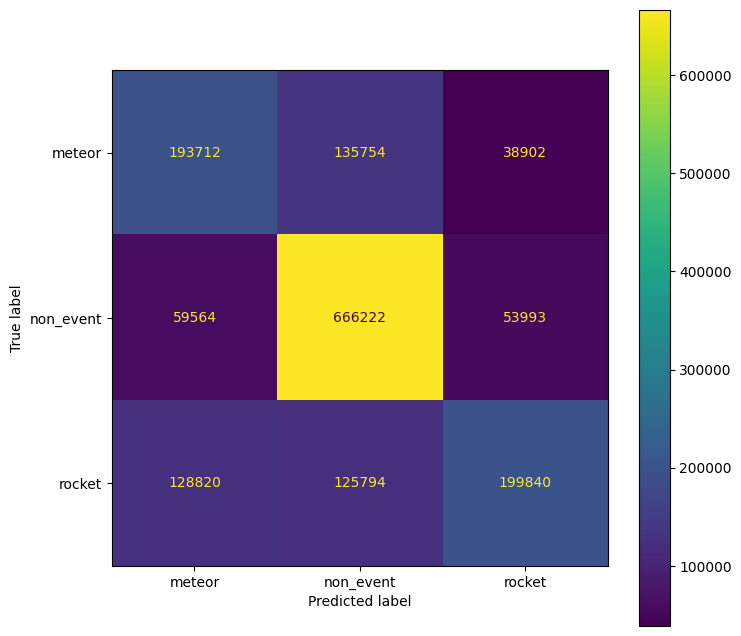

In [37]:
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,values_format='.0f')
fig = plt.gcf()
fig.set_size_inches(8,8)


In [11]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/Users/aschad/miniconda3/envs/capstone/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
accuracy_score(y_test, y_pred)

0.9365594805700047

## CNN

Code below creates PNG files for every parquet file for every event and non event

In [49]:
file_folder = 'example_data'
csv_files = glob.glob(f'{file_folder}/*.csv')
csv_files

['example_data/data-2024-07-27T01-00-19-879042.csv',
 'example_data/data-2024-07-27T01-01-39-879042.csv',
 'example_data/data-2024-07-27T01-00-49-879042.csv',
 'example_data/data-2024-07-27T01-01-09-879042.csv',
 'example_data/data-2024-07-27T01-01-59-879042.csv',
 'example_data/data-2024-07-27T01-00-29-879042.csv',
 'example_data/data-2024-07-27T01-00-59-879042.csv',
 'example_data/data-2024-07-27T01-01-29-879042.csv',
 'example_data/data-2024-07-27T01-00-09-879042.csv',
 'example_data/data-2024-07-27T01-00-39-879042.csv',
 'example_data/data-2024-07-27T01-01-49-879042.csv',
 'example_data/data-2024-07-27T01-01-19-879042.csv']

In [ ]:
for file in non_event_files :

    df_round = pd.read_parquet(file)
    image_folder = 'example_images'
    df_round = df_round.rename(columns={'Channel 0' : 'Channel 1','Channel 1':'Channel 2'})
    date_format = "%Y-%m-%dT%H-%M-%S"
    date_string = '-'.join(file.split("data-")[-1].split('-')[:-1])
    print(date_string)
    date_object = datetime.strptime(date_string, date_format)


    df_round['Datetime'] = df_round['Time'].apply(lambda x : date_object + timedelta(0,x))


    fft_plot1,fft_plot2 = fft_generator([file],image_folder,df_round,-180,-60,-200,-10,'magma',200)
    fft_plot1,fft_plot2 =go.Figure(fft_plot1),go.Figure(fft_plot2)
    
    fft_plot1.update_layout(
    title=None,  # Remove title
    xaxis_showticklabels=False,  # Hide x-axis tick labels
    yaxis_showticklabels=False,  # Hide y-axis tick labels
    xaxis_visible=False,  # Hide x-axis line
    yaxis_visible=False,  # Hide y-axis line
    margin=dict(l=0, r=0, b=0, t=0)  # Remove margins
      # Remove margins
   ,showlegend=False
)
    fft_plot1.update_traces(showscale=False)

    fft_plot2.update_layout(
        title=None,  # Remove title
        xaxis_showticklabels=False,  # Hide x-axis tick labels
        yaxis_showticklabels=False,  # Hide y-axis tick labels
        xaxis_visible=False,  # Hide x-axis line
        yaxis_visible=False,  # Hide y-axis line
        margin=dict(l=0, r=0, b=0, t=0),  # Remove margins
       showlegend=False

    )
    fft_plot2.update_traces(showscale=False)
    print('got here')


    # Save the figure as PNG
    pio.write_image(fft_plot1, f'ml_model/ml_images/non_event/{file.split("data-")[-1].split(".csv")[0]}_1.png')
    print('got here')

    pio.write_image(fft_plot2, f'ml_model/ml_images/non_event/{file.split("data-")[-1].split(".csv")[0]}_2.png')
    print('got here')



2024-07-26T23-40-09
Running main for ['E:/TDVS\\2024-07-26(120)\\23-00(120)\\data-2024-07-26T23-40-09-879042.parquet']
length of total df 0
t chunk [1.01000e-03 2.76000e-03 4.51000e-03 ... 9.99526e+00 9.99701e+00
 9.99876e+00]
t chunk [1.01000e-03 2.76000e-03 4.51000e-03 ... 9.99526e+00 9.99701e+00
 9.99876e+00]
got here
got here
got here
2024-07-26T23-40-19
Running main for ['E:/TDVS\\2024-07-26(120)\\23-00(120)\\data-2024-07-26T23-40-19-879042.parquet']
length of total df 0
t chunk [10.00101 10.00276 10.00451 ... 19.99526 19.99701 19.99876]
t chunk [10.00101 10.00276 10.00451 ... 19.99526 19.99701 19.99876]
got here
got here
got here
2024-07-26T23-40-29
Running main for ['E:/TDVS\\2024-07-26(120)\\23-00(120)\\data-2024-07-26T23-40-29-879042.parquet']
length of total df 0
t chunk [20.00101 20.00276 20.00451 ... 29.99526 29.99701 29.99876]
t chunk [20.00101 20.00276 20.00451 ... 29.99526 29.99701 29.99876]
got here
got here
got here
2024-07-26T23-40-39
Running main for ['E:/TDVS\\2024-

: 

In [77]:
for file in rocket_files :

    df_round = pd.read_parquet(file)
    image_folder = 'example_images'
    df_round = df_round.rename(columns={'Channel 0' : 'Channel 1','Channel 1':'Channel 2'})
    date_format = "%Y-%m-%dT%H-%M-%S"
    date_string = '-'.join(file.split("data-")[-1].split('-')[:-1])
    print(date_string)
    date_object = datetime.strptime(date_string, date_format)


    df_round['Datetime'] = df_round['Time'].apply(lambda x : date_object + timedelta(0,x))


    fft_plot1,fft_plot2 = fft_generator([file],image_folder,df_round,-180,-60,-200,-10,'magma',200)
    fft_plot1,fft_plot2 =go.Figure(fft_plot1),go.Figure(fft_plot2)
    
    fft_plot1.update_layout(
    title=None,  # Remove title
    xaxis_showticklabels=False,  # Hide x-axis tick labels
    yaxis_showticklabels=False,  # Hide y-axis tick labels
    xaxis_visible=False,  # Hide x-axis line
    yaxis_visible=False,  # Hide y-axis line
    margin=dict(l=0, r=0, b=0, t=0)  # Remove margins
      # Remove margins
   ,showlegend=False
)
    fft_plot1.update_traces(showscale=False)

    fft_plot2.update_layout(
        title=None,  # Remove title
        xaxis_showticklabels=False,  # Hide x-axis tick labels
        yaxis_showticklabels=False,  # Hide y-axis tick labels
        xaxis_visible=False,  # Hide x-axis line
        yaxis_visible=False,  # Hide y-axis line
        margin=dict(l=0, r=0, b=0, t=0),  # Remove margins
       showlegend=False

    )
    fft_plot2.update_traces(showscale=False)
    print('got here')


    # Save the figure as PNG
    pio.write_image(fft_plot1, f'ml_model/ml_images/rocket/{file.split("data-")[-1].split(".csv")[0]}_1.png')
    print('got here')

    pio.write_image(fft_plot2, f'ml_model/ml_images/rocket/{file.split("data-")[-1].split(".csv")[0]}_2.png')
    print('got here')



2024-07-27T05-44-59
Running main for ['E:/TDVS\\2024-07-27(6789)\\05-00(360)\\data-2024-07-27T05-44-59-879042.parquet']
length of total df 0
t chunk [21890.00101 21890.00276 21890.00451 ... 21899.99526 21899.99701
 21899.99876]
t chunk [21890.00101 21890.00276 21890.00451 ... 21899.99526 21899.99701
 21899.99876]
got here
got here
got here
2024-07-27T05-45-09
Running main for ['E:/TDVS\\2024-07-27(6789)\\05-00(360)\\data-2024-07-27T05-45-09-879042.parquet']
length of total df 0
t chunk [21900.00101 21900.00276 21900.00451 ... 21909.99526 21909.99701
 21909.99876]
t chunk [21900.00101 21900.00276 21900.00451 ... 21909.99526 21909.99701
 21909.99876]
got here
got here
got here
2024-07-27T05-45-19
Running main for ['E:/TDVS\\2024-07-27(6789)\\05-00(360)\\data-2024-07-27T05-45-19-879042.parquet']
length of total df 0
t chunk [21910.00101 21910.00276 21910.00451 ... 21919.99526 21919.99701
 21919.99876]
t chunk [21910.00101 21910.00276 21910.00451 ... 21919.99526 21919.99701
 21919.99876]
g

In [76]:
for file in meteor_files :

    df_round = pd.read_parquet(file)
    image_folder = 'example_images'
    df_round = df_round.rename(columns={'Channel 0' : 'Channel 1','Channel 1':'Channel 2'})
    date_format = "%Y-%m-%dT%H-%M-%S"
    date_string = '-'.join(file.split("data-")[-1].split('-')[:-1])
    print(date_string)
    date_object = datetime.strptime(date_string, date_format)


    df_round['Datetime'] = df_round['Time'].apply(lambda x : date_object + timedelta(0,x))


    fft_plot1,fft_plot2 = fft_generator([file],image_folder,df_round,-180,-60,-200,-10,'magma',200)
    fft_plot1,fft_plot2 =go.Figure(fft_plot1),go.Figure(fft_plot2)
    
    fft_plot1.update_layout(
    title=None,  # Remove title
    xaxis_showticklabels=False,  # Hide x-axis tick labels
    yaxis_showticklabels=False,  # Hide y-axis tick labels
    xaxis_visible=False,  # Hide x-axis line
    yaxis_visible=False,  # Hide y-axis line
    margin=dict(l=0, r=0, b=0, t=0)  # Remove margins
      # Remove margins
   ,showlegend=False
)
    fft_plot1.update_traces(showscale=False)

    fft_plot2.update_layout(
        title=None,  # Remove title
        xaxis_showticklabels=False,  # Hide x-axis tick labels
        yaxis_showticklabels=False,  # Hide y-axis tick labels
        xaxis_visible=False,  # Hide x-axis line
        yaxis_visible=False,  # Hide y-axis line
        margin=dict(l=0, r=0, b=0, t=0),  # Remove margins
       showlegend=False

    )
    fft_plot2.update_traces(showscale=False)
    print('got here')


    # Save the figure as PNG
    pio.write_image(fft_plot1, f'ml_model/ml_images/meteor/{file.split("data-")[-1].split(".csv")[0]}_1.png')
    print('got here')

    pio.write_image(fft_plot2, f'ml_model/ml_images/meteor/{file.split("data-")[-1].split(".csv")[0]}_2.png')
    print('got here')



2024-07-27T00-51-59
Running main for ['E:/TDVS\\2024-07-27(6789)\\00-00(360)\\data-2024-07-27T00-51-59-879042.parquet']
length of total df 0
t chunk [4310.00101 4310.00276 4310.00451 ... 4319.99526 4319.99701 4319.99876]
t chunk [4310.00101 4310.00276 4310.00451 ... 4319.99526 4319.99701 4319.99876]
got here
got here
got here
2024-07-27T01-13-59
Running main for ['E:/TDVS\\2024-07-27(6789)\\01-00(360)\\data-2024-07-27T01-13-59-879042.parquet']
length of total df 0
t chunk [5630.00101 5630.00276 5630.00451 ... 5639.99526 5639.99701 5639.99876]
t chunk [5630.00101 5630.00276 5630.00451 ... 5639.99526 5639.99701 5639.99876]
got here
got here
got here
2024-07-27T01-42-59
Running main for ['E:/TDVS\\2024-07-27(6789)\\01-00(360)\\data-2024-07-27T01-42-59-879042.parquet']
length of total df 0
t chunk [7370.00101 7370.00276 7370.00451 ... 7379.99526 7379.99701 7379.99876]
t chunk [7370.00101 7370.00276 7370.00451 ... 7379.99526 7379.99701 7379.99876]
got here
got here
got here
2024-07-27T01-59

c:\Users\Embed\OneDrive\Desktop\SEAL_ANTENNA\AntennasProject\data_processing\B_FFT_Graph_Generator\FFT_Generator_image.py:79: RuntimeWarning:

divide by zero encountered in log10



got here
got here
2024-08-24T01-14-50
Running main for ['E:/TDVS\\2024-08-24(7870)\\01-00(360)\\data-2024-08-24T01-14-50-885366.parquet']
length of total df 0
t chunk [35760.00101 35760.00276 35760.00451 ... 35769.99526 35769.99701
 35769.99876]
t chunk [35760.00101 35760.00276 35760.00451 ... 35769.99526 35769.99701
 35769.99876]
got here
got here
got here
2024-08-24T01-15-00
Running main for ['E:/TDVS\\2024-08-24(7870)\\01-00(360)\\data-2024-08-24T01-15-00-885366.parquet']
length of total df 0
t chunk [35770.00101 35770.00276 35770.00451 ... 35779.99526 35779.99701
 35779.99876]
t chunk [35770.00101 35770.00276 35770.00451 ... 35779.99526 35779.99701
 35779.99876]
got here
got here
got here
2024-08-24T02-09-50
Running main for ['E:/TDVS\\2024-08-24(7870)\\02-00(360)\\data-2024-08-24T02-09-50-885366.parquet']
length of total df 0
t chunk [39060.00101 39060.00276 39060.00451 ... 39069.99526 39069.99701
 39069.99876]
t chunk [39060.00101 39060.00276 39060.00451 ... 39069.99526 39069.997

In [25]:
get_np_array(meteor_files[0],'meteor')

array([[[248, 129, 100, 255],
        [253, 166, 115, 255],
        [253, 156, 108, 255],
        ...,
        [252, 144, 103, 255],
        [254, 181, 126, 255],
        [253, 152, 105, 255]],

       [[248, 129, 100, 255],
        [253, 166, 115, 255],
        [253, 156, 108, 255],
        ...,
        [252, 144, 103, 255],
        [254, 181, 126, 255],
        [253, 152, 105, 255]],

       [[248, 129, 100, 255],
        [253, 166, 115, 255],
        [253, 156, 108, 255],
        ...,
        [252, 144, 103, 255],
        [254, 181, 126, 255],
        [253, 152, 105, 255]],

       ...,

       [[242, 100,  94, 255],
        [237,  93,  95, 255],
        [229,  85, 100, 255],
        ...,
        [194,  60, 116, 255],
        [235,  90,  97, 255],
        [242, 100,  94, 255]],

       [[242, 100,  94, 255],
        [237,  93,  95, 255],
        [229,  85, 100, 255],
        ...,
        [194,  60, 116, 255],
        [235,  90,  97, 255],
        [242, 100,  94, 255]],

       [[242

In [7]:
def get_np_array(file,event) : 
    image_path1 = f'ml_model/ml_images/{event}/{file.split("data-")[-1].split(".csv")[0]}_1.png'
    image_path2 = f'ml_model/ml_images/{event}/{file.split("data-")[-1].split(".csv")[0]}_2.png'

    
    image1 = Image.open(image_path1)
    img_array1 = np.array(image1)
    
    
    image2 = Image.open(image_path2)
    img_array2 = np.array(image2)
    final_img_array = np.concatenate((img_array1, img_array2), axis=0)
    return final_img_array

In [ ]:
X_images = df_ml_dataset[['Channel 0','Channel 1']].values
y_image_labels = df_ml_dataset['event'].values
groups = df_ml_dataset['event_id'].values

In [ ]:
train_images = []
train_labels = []
for x in meteor_files[:80] : 
    train_images.append(get_np_array(x,'meteor'))
    train_labels.append([0,1,0])
    
for x in rocket_files[:80] : 
    train_images.append(get_np_array(x,'rocket'))
    train_labels.append([0,0,1])
    
for x in non_event_files[:160] : 
    train_images.append(get_np_array(x,'non_event'))
    train_labels.append([1,0,0])

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [35]:
test_images = []
test_labels = []
for x in meteor_files[80:100] : 
    test_images.append(get_np_array(x,'meteor'))
    test_labels.append([0,1,0])
    
for x in rocket_files[80:100] : 
    test_images.append(get_np_array(x,'rocket'))
    test_labels.append([0,0,1])
    
for x in non_event_files[160:200] : 
    test_images.append(get_np_array(x,'non_event'))
    test_labels.append([1,0,0])

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [73]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(1000, 700, 4)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4), activation='softmax'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='softmax'))
model.add(layers.Dense(3,activation='softmax',name='multiclass_output'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 997, 697, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 498, 348, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 495, 345, 128)  │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 247, 172, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 244, 169, 64)   │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2639104)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │   337,805,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiclass_output (Dense)       │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,004,707 (1.26 GB)

 Trainable params: 338,004,707 (1.26 GB)

 Non-trainable params: 0 (0.00 B)

In [74]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy','f1_score'])

In [75]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.3322 - f1_score: 0.2281 - loss: 1.1093 - val_accuracy: 0.2500 - val_f1_score: 0.1333 - val_loss: 1.0986
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.2824 - f1_score: 0.1628 - loss: 1.0915 - val_accuracy: 0.5000 - val_f1_score: 0.2222 - val_loss: 1.0757
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4880 - f1_score: 0.2186 - loss: 1.0678 - val_accuracy: 0.5000 - val_f1_score: 0.2222 - val_loss: 1.0718
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5167 - f1_score: 0.2271 - loss: 1.0650 - val_accuracy: 0.5000 - val_f1_score: 0.2222 - val_loss: 1.0678
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5056 - f1_score: 0.2238 - loss: 1.0649 - val_accuracy: 0.5000 - val_f1_score: 0.2222 - val_loss: 1.0643


In [69]:
y_pred = model.predict(test_images)
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step


array([[0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.50400066, 0.24786738, 0.24813193],
       [0.

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

C:\Users\Embed\AppData\Local\Temp\ipykernel_8140\1879279066.py:7: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



3/3 - 1s - 196ms/step - accuracy: 0.7500 - loss: 0.4945
